## Anita Soroush 98222085 - Machine Learning 

This dataset is related to:

*   **Project 1, Task 1**
*   **Project 2, Task 1**


In [52]:
! pip install kaggle

In [5]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

dataset url: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [7]:
! kaggle datasets download iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 44.3MB/s]


In [8]:
! unzip mobile-price-classification.zip

Archive:  mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [9]:
import sys
import os
import pandas as pd
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn import datasets
import os
import csv
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from sklearn import metrics
from sklearn.feature_selection import RFE

## **Data Cleaning**

In [67]:
data = pd.read_csv('train.csv')

In [11]:
data.shape

(2000, 21)

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
nulls = data.isnull().sum()
nulls

In [ ]:
data.duplicated().any()

finding outliers (Using Standard Ddeviation):

In [68]:
# the following list contains columns that may have outlier
columns = ["battery_power", "clock_speed", "fc", "int_memory", "m_dep", 
           "mobile_wt", "n_cores", "pc", "px_height", "px_width","ram",
           "sc_h", "sc_w", "talk_time"]

print("data shape before putting outliers aside:" , data.shape)
for column in columns:
    # print(column)
    upper = data[column].mean() + 3*data[column].std()
    lower = data[column].mean() - 3*data[column].std()
    # print(lower, upper)
    data= data[(data[column]<upper) & (data[column]>lower)]
print("data shape after putting outliers aside:" , data.shape)

data shape before putting outliers aside: (2000, 21)
data shape after putting outliers aside: (1988, 21)


In [ ]:
data.describe()

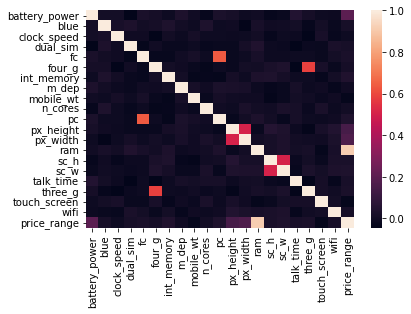

In [13]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f9ccdb490>,
      dtype=object)

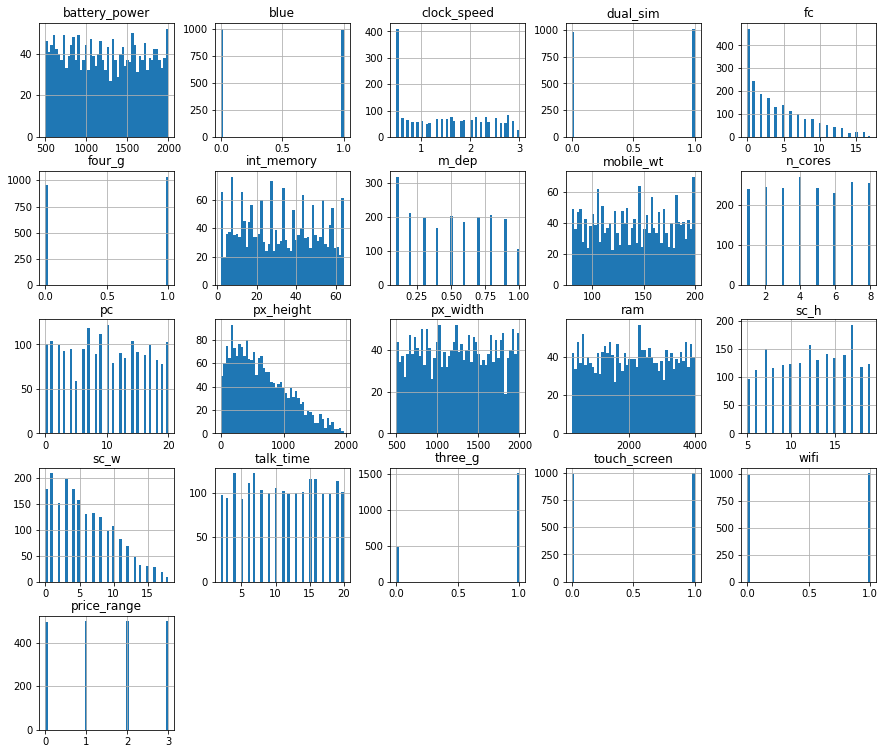

In [10]:
data.hist(bins=50, figsize=(15,13))

# **Project 1**

### **Hypothetical tests:**

In [54]:
from scipy.stats import shapiro
stat, p = shapiro(data["talk_time"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.948, p=0.000
Probably not Gaussian


In [ ]:
# we need normalizing before most of the hypothetical tests:
normalizer = preprocessing.Normalizer().fit(data)
normalized_data = pd.DataFrame(normalizer.transform(data),
                           index= data.index,
                           columns= data.columns)

In [ ]:
import seaborn as sns
corr = normalized_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
from scipy.stats import pearsonr
data1 = normalized_data["ram"]
data2 = normalized_data["price_range"]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

In [ ]:
from scipy.stats import ttest_ind
cheapest_phones = data.loc[data["price_range"] == 0]
data1 = cheapest_phones["pc"]
other_phones = data.loc[data["price_range"] != 0]
data2 = other_phones["pc"]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the difference is not significant')
else:
	print('Probably the different is significant')

In [ ]:
data1 = cheapest_phones["touch_screen"]
data2 = other_phones["touch_screen"]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the difference is not significant')
else:
	print('Probably the different is significant')

In [ ]:
from scipy.stats import pearsonr
data1 = normalized_data["pc"]
data2 = normalized_data["ram"]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

In [ ]:
have_four_g = data.loc[data["four_g"] == 1]
sns.countplot(have_four_g['three_g'])

In [ ]:
just_3_g = data.loc[(data["three_g"] == 1) & (data["four_g"] == 0)]
four_g = data.loc[data["four_g"] == 1]
stat, p = ttest_ind(just_3_g['price_range'], four_g['price_range'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the difference is not significant')
else:
	print('Probably the different is significant')

splitting test and train data:

In [ ]:
X = data.drop('price_range', axis=1)
y = data['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## **Classification:**

(Logistic regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# one-vs-rest
OvR_clf = OneVsRestClassifier(LogisticRegression())
OvR_clf.fit(X_train, y_train)

y_test_pred = OvR_clf.predict(X_test)
print('Accuracy of OvR Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovr)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('OvR Logistic Regression:\nConfusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# one-vs-one
OvO_clf = OneVsOneClassifier(LogisticRegression())
OvO_clf.fit(X_train, y_train)

y_test_pred = OvO_clf.predict(X_test)
print('Accuracy of OvO Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovo)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('OvO Logistic Regression:\nConfusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

(SVM):

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# one-vs-rest
OvR_clf = OneVsRestClassifier(SVC())
OvR_clf.fit(X_train, y_train)

y_test_pred = OvR_clf.predict(X_test)
print('Accuracy of OvR Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovr)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('OvR SVM\nConfusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# one-vs-one
OvO_clf = OneVsOneClassifier(SVC())
OvO_clf.fit(X_train, y_train)

y_test_pred = OvO_clf.predict(X_test)
print('Accuracy of OvO Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovo)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('OvO SVM\nConfusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
data['price_range'].value_counts()

In [ ]:
# visualizing the target variable
sns.countplot(data['price_range'])

## **Scaling:**

first of all we should fit the scaler on training data and then use it to scale both the training and the test data.

In [ ]:
# standard scaler:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = pd.DataFrame(std_scale.transform(X_train),
                           index= X_train.index,
                           columns= X_train.columns)
X_test_std  = pd.DataFrame(std_scale.transform(X_test),
                           index= X_test.index,
                           columns= X_test.columns)

In [ ]:
X_train_std.hist(bins=50, figsize=(15,13))

Accuracy of OvR Classifier: 0.82


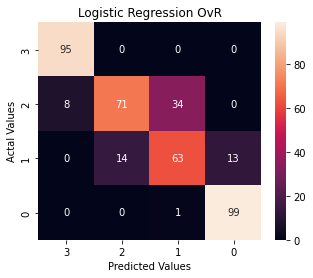

Accuracy of OvO Classifier: 0.96


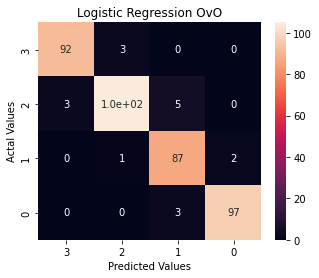

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# one-vs-rest
OvR_clf = OneVsRestClassifier(LogisticRegression())
OvR_clf.fit(X_train_std, y_train)

y_test_pred = OvR_clf.predict(X_test_std)
print('Accuracy of OvR Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovr)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('Logistic Regression OvR')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# one-vs-one
OvO_clf = OneVsOneClassifier(LogisticRegression())
OvO_clf.fit(X_train_std, y_train)

y_test_pred = OvO_clf.predict(X_test_std)
print('Accuracy of OvO Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovo)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('Logistic Regression OvO')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# min-max scaler
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_minmax = pd.DataFrame(min_max_scaler.transform(X_train),
                           index= X_train.index,
                           columns= X_train.columns)
X_test_minmax = pd.DataFrame(min_max_scaler.transform(X_test),
                           index= X_test.index,
                           columns= X_test.columns)

Accuracy: 0.78


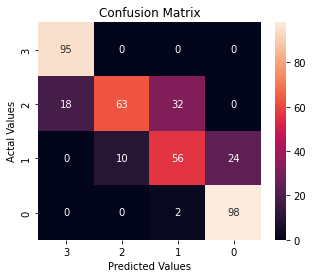

Accuracy: 0.94


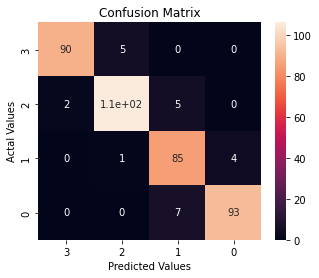

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# one-vs-rest
OvR_clf = OneVsRestClassifier(LogisticRegression())
OvR_clf.fit(X_train_minmax, y_train)

y_test_pred = OvR_clf.predict(X_test_minmax)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovr)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# one-vs-one
OvO_clf = OneVsOneClassifier(LogisticRegression())
OvO_clf.fit(X_train_minmax, y_train)

y_test_pred = OvO_clf.predict(X_test_minmax)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovo)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab41260690>,
      dtype=object)

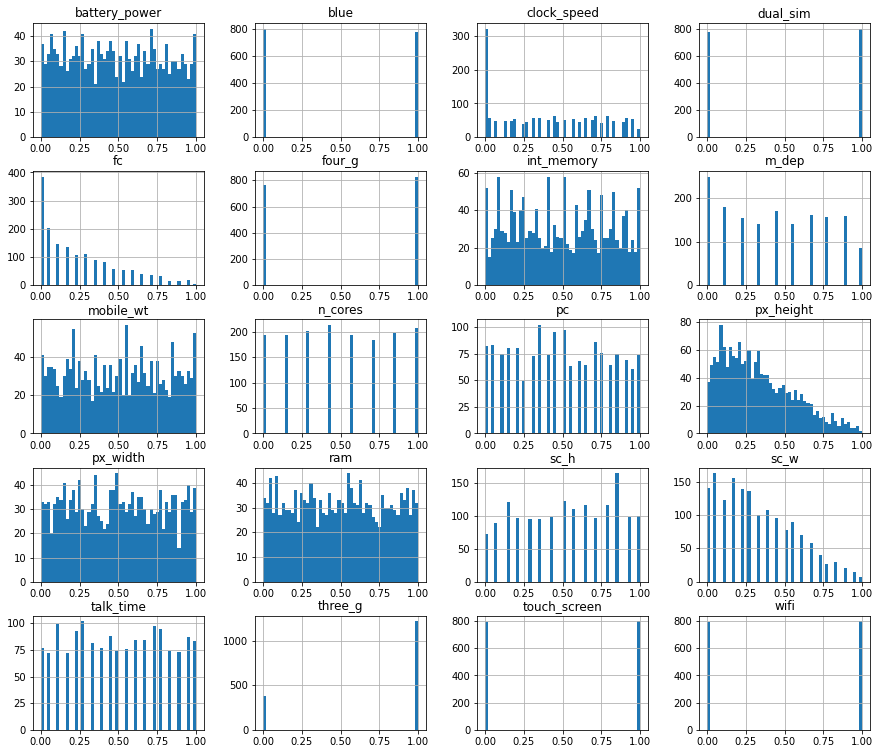

In [ ]:
X_train_minmax.hist(bins=50, figsize=(15,13))

In [ ]:
# normalization
normalizer = preprocessing.Normalizer().fit(X_train)
X_train_normalized = pd.DataFrame(normalizer.transform(X_train),
                           index= X_train.index,
                           columns= X_train.columns)
X_test_normalized = pd.DataFrame(normalizer.transform(X_test),
                           index= X_test.index,
                           columns= X_test.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab3d58bc50>,
      dtype=object)

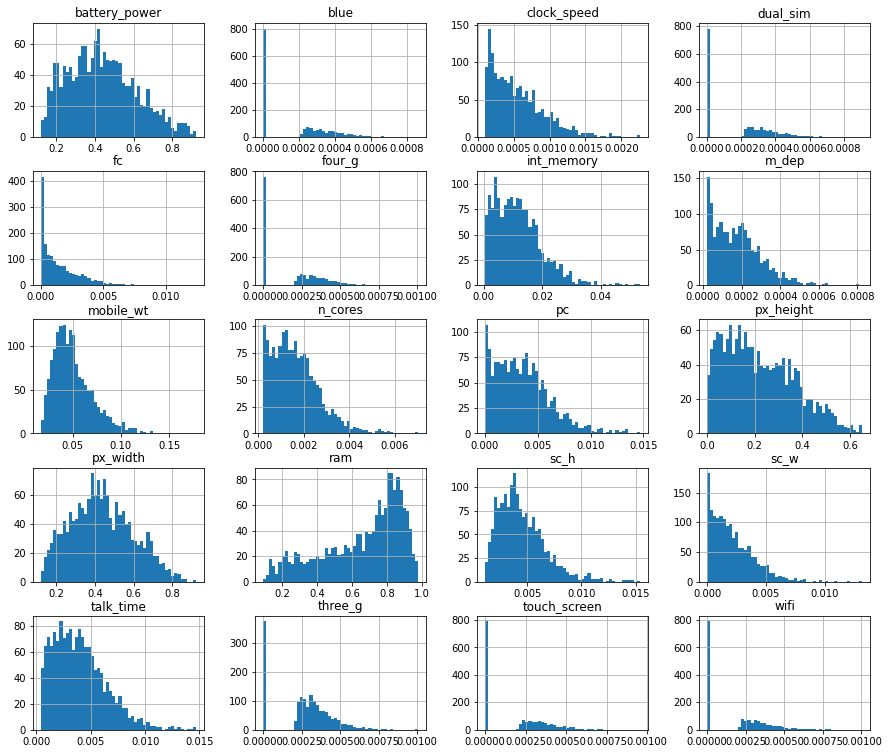

In [ ]:
X_train_normalized.hist(bins=50, figsize=(15,13))

Accuracy of OvR Classifier: 0.52


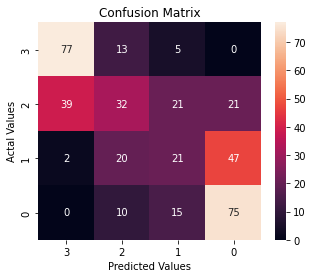

Accuracy of OvO Classifier: 0.54


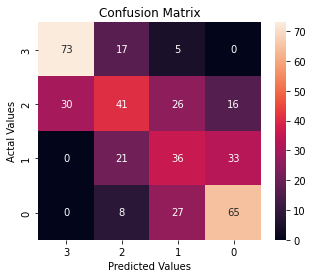

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# one-vs-rest
OvR_clf = OneVsRestClassifier(LogisticRegression())
OvR_clf.fit(X_train_normalized, y_train)

y_test_pred = OvR_clf.predict(X_test_normalized)
print('Accuracy of OvR Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovr)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# one-vs-one
OvO_clf = OneVsOneClassifier(LogisticRegression())
OvO_clf.fit(X_train_normalized, y_train)

y_test_pred = OvO_clf.predict(X_test_normalized)
print('Accuracy of OvO Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovo)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents , columns = ['PC1', 'PC2'])
target = pd.Series(y, name='price_range')
result_df = pd.concat([principalDf, target], axis=1)
result_df.head()

# Calculate the variance explained by priciple components

print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.67050269 0.16473528]

 Total Variance Explained: 83.52


Accuracy of LR OvO Classifier: 0.96
number of principal components: 4


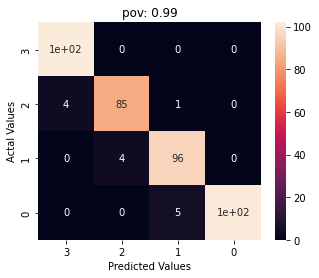

Accuracy of LR OvO Classifier: 0.95
number of principal components: 4


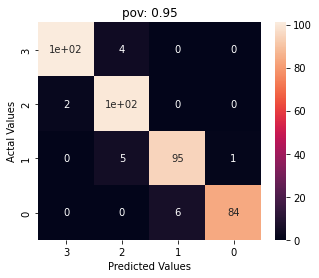

Accuracy of LR OvO Classifier: 0.96
number of principal components: 3


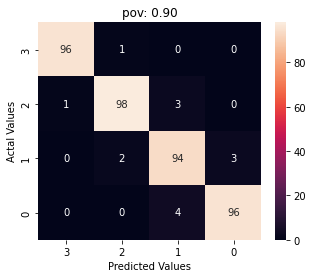

Accuracy of LR OvO Classifier: 0.94
number of principal components: 3


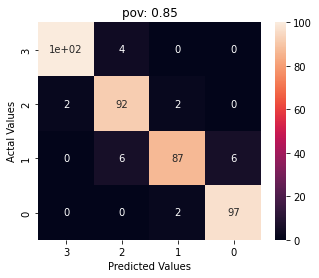

Accuracy of LR OvO Classifier: 0.80
number of principal components: 2


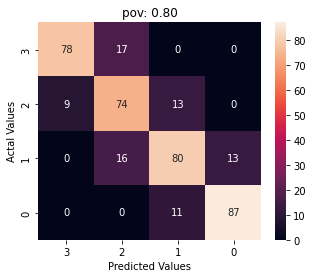

Accuracy of LR OvO Classifier: 0.79
number of principal components: 2


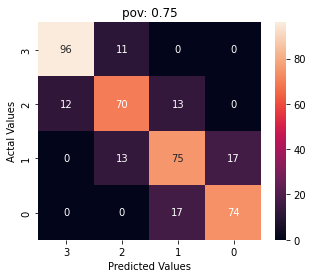

Accuracy of LR OvO Classifier: 0.82
number of principal components: 2


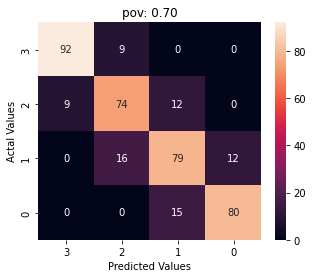

Accuracy of LR OvO Classifier: 0.74
number of principal components: 1


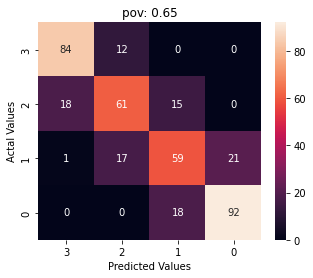

Accuracy of LR OvO Classifier: 0.71
number of principal components: 1


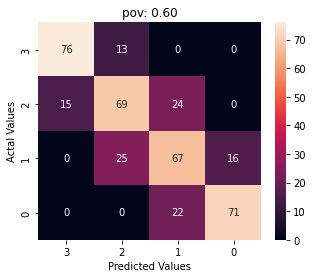

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

pov_list = [0.99, 0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60]
for pov in pov_list:
    pca = PCA(n_components=pov, svd_solver = "full")
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents)
    projected_X_train, projected_X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.20)

    # one-vs-one
    OvO_clf = OneVsOneClassifier(LogisticRegression())
    OvO_clf.fit(projected_X_train, y_train)

    y_test_pred = OvO_clf.predict(projected_X_test)
    print('Accuracy of LR OvO Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))
    print('number of principal components: {:d}'.format(principalDf.shape[1]))

    # confusion matrix (ovo)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix,
                        index = ['3','2','1','0'], 
                        columns = ['3','2','1','0'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix_df, annot=True)
    plt.title('pov: {:.2f}'.format(pov))
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [ ]:
data["new_price_range"] = data['price_range']
# 0 ==> 0  
# 1, 2, 3 ==> 4

for index, row in data.iterrows():
    if row["new_price_range"] != 0:
        data['new_price_range'][index] = 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
X = data.drop('new_price_range', axis=1)
y = data['new_price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


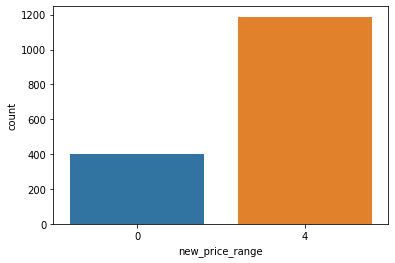

In [ ]:
# visualizing the target variable
sns.countplot(y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.94


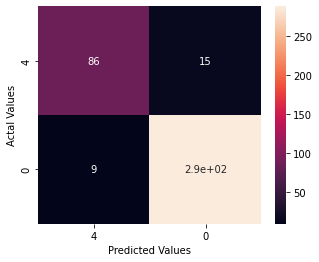

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# one-vs-one
OvO_clf = OneVsOneClassifier(LogisticRegression())
OvO_clf.fit(X_train, y_train)

y_test_pred = OvO_clf.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovo)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                    index = ['4','0'], 
                    columns = ['4','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Random Oversampling:

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.93


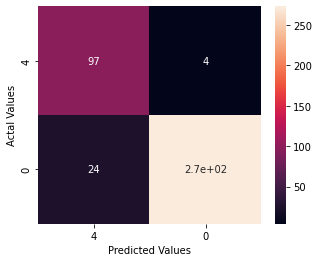

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# one-vs-one
OvO_clf = OneVsOneClassifier(LogisticRegression())
OvO_clf.fit(X_train_over, y_train_over)

y_test_pred = OvO_clf.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovo)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                    index = ['4','0'], 
                    columns = ['4','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


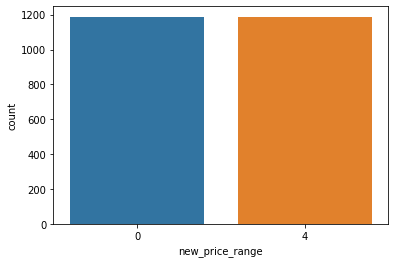

In [ ]:
sns.countplot(y_train_over)

# **Project 2**

## **Forward Selection:**

In [69]:
from sklearn.metrics import roc_auc_score
def forward_selection(model, X_train, y_train, X_test, y_test):
    initial_features = X_train.columns.tolist()
    best_features = []
    previous_max_score = float('-inf')
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        auc_score_list = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model.fit(X_train[best_features+[new_column]], y_train)
            y_test_pred = model.predict(X_test[best_features+[new_column]])
            a = roc_auc_score(y_test, y_test_pred)
            auc_score_list[new_column] = a
        max_score = auc_score_list.max()
        selected_feature = auc_score_list.idxmax()
        print (selected_feature, max_score)
        best_features.append(selected_feature)
        # print(best_features)
        # print (max_score - previous_max_score)
        if (max_score - previous_max_score < 0.01):
            break
        previous_max_score = max_score
    return best_features

In [70]:
data["binary_price_range"] = data['price_range']
data.drop('price_range', axis = 1 , inplace = True)

# 0, 1 ==> 0  
# 2, 3 ==> 1

for index, row in data.iterrows():
    if row['binary_price_range'] == 0 or row['binary_price_range'] == 1:
        data['binary_price_range'][index] = 0
    else:
        data['binary_price_range'][index] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [71]:
X = data.drop('binary_price_range', axis=1)
y = data['binary_price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


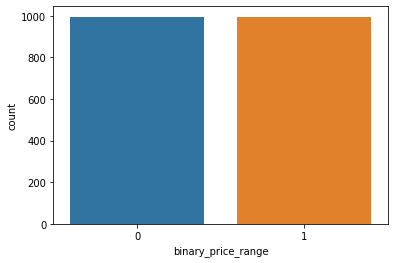

In [72]:
sns.countplot(data['binary_price_range'])

In [73]:
from sklearn.linear_model import LogisticRegression
best_features = forward_selection(LogisticRegression(), X_train, y_train, X_test, y_test)
print(best_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


ram 0.8971212121212121


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


px_height 0.9196464646464647


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


battery_power 0.9723989898989898


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


px_width 0.99


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


n_cores 0.995
['ram', 'px_height', 'battery_power', 'px_width', 'n_cores']


In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train[best_features], y_train)
y_test_pred = model.predict(X_test[best_features])

# precision score:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_test_pred))

# recall score 
from sklearn.metrics import recall_score
print(recall_score(y_test, y_test_pred))

# f1 score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_test_pred))


0.99
1.0
0.9949748743718593


In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
target = pd.Series(y, name='binary_price_range')
result_df = pd.concat([principalDf, target], axis=1)
result_df.head()

,PC1,PC2,PC3,PC4,PC5,binary_price_range
0,-427.466896,-797.671767,-384.198229,56.237332,-48.478394,0.0
1,-503.102397,696.075464,-239.173162,342.181772,4.455726,1.0
2,-471.258518,759.887568,-684.264305,-115.505931,-4.901949,1.0
3,-637.792833,775.947754,-635.117746,-32.053544,8.459410,1.0
4,720.797455,386.879128,589.624660,-393.990082,-0.400453,0.0


In [76]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, target, test_size=0.20)

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

# precision score:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_test_pred))

# recall score 
from sklearn.metrics import recall_score
print(recall_score(y_test, y_test_pred))

# f1 score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_test_pred))

0.9950980392156863
1.0
0.9975429975429976


## **Feature Engineering:**

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,binary_price_range
count,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,...,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.00000,1988.000000
mean,1237.593058,0.495473,1.522133,0.509054,4.226358,0.520624,32.089034,0.502012,140.159457,4.524145,...,643.926559,1251.535714,2126.544266,12.308350,5.771630,11.014588,0.760563,0.502515,0.50503,0.500503
std,439.498835,0.500105,0.816811,0.500044,4.220051,0.499700,18.128175,0.288438,35.361078,2.289980,...,442.961039,432.086772,1084.186322,4.215626,4.361399,5.459398,0.426847,0.500119,0.50010,0.500126
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000
25%,851.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.750000,1210.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.00000,0.000000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.00000,1.000000
75%,1615.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,945.250000,1632.250000,3066.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.00000,1.000000
max,1998.000000,1.000000,3.000000,1.000000,17.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.00000,1.000000


In [78]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def SVMClassifier(X_train, X_test, y_train, y_test):
    clf = SVC()
    clf.fit(X_train, y_train)

    y_test_pred = clf.predict(X_test)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

    # confusion matrix ()
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix,
                        index = ['1','0'], 
                        columns = ['1','0'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix_df, annot=True)
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

Binning battery_power

In [79]:
data['battery_power'].describe()

count    1988.000000
mean     1237.593058
std       439.498835
min       501.000000
25%       851.000000
50%      1225.000000
75%      1615.000000
max      1998.000000
Name: battery_power, dtype: float64

In the example below, we tell pandas to create 4 equal sized groupings of the data.

In [30]:
labels=[1, 2, 3]

In [80]:
data['battery_power_binned1'] = pd.qcut(data['battery_power'], q=3 , labels=labels)
data['battery_power_binned1']

0       1
1       2
2       1
3       1
4       3
       ..
1995    1
1996    3
1997    3
1998    3
1999    1
Name: battery_power_binned1, Length: 1988, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [84]:
data['battery_power_binned1'].value_counts()

1    663
3    663
2    662
Name: battery_power_binned1, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


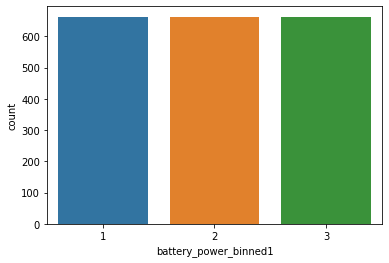

In [85]:
sns.countplot(data['battery_power_binned1'])

In [86]:
data['battery_power_binned2'] = pd.qcut(data['battery_power'], q=[0, .2, .8, 1], labels=labels)
data['battery_power_binned2'].value_counts()

2    1193
1     399
3     396
Name: battery_power_binned2, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


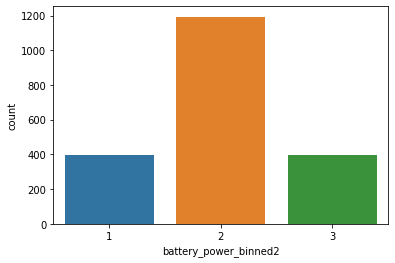

In [87]:
sns.countplot(data['battery_power_binned2'])

Accuracy: 0.94


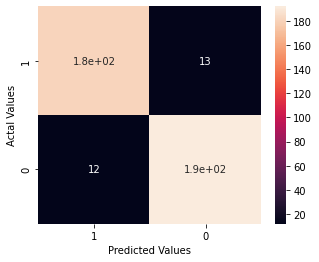

In [88]:
X = data.drop(['binary_price_range', 'battery_power_binned2', 'battery_power'], axis=1)
y = data['binary_price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
SVMClassifier(X_train, X_test, y_train, y_test)

Accuracy: 0.92


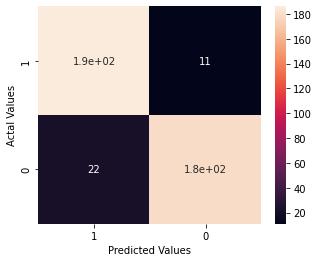

In [89]:
X = data.drop(['binary_price_range', 'battery_power_binned1', 'battery_power'], axis=1)
y = data['binary_price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
SVMClassifier(X_train, X_test, y_train, y_test)

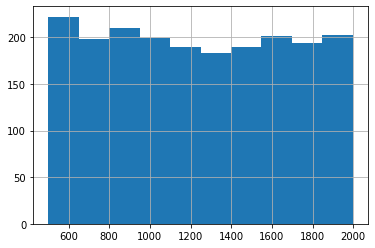

In [90]:
data['battery_power'].hist()

In [91]:
battery_power_binned1 = data['battery_power_binned1']
battery_power_binned2 = data['battery_power_binned2']
data.drop(['battery_power_binned1', 'battery_power_binned2'], axis=1, inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   battery_power       1988 non-null   int64  
 1   blue                1988 non-null   int64  
 2   clock_speed         1988 non-null   float64
 3   dual_sim            1988 non-null   int64  
 4   fc                  1988 non-null   int64  
 5   four_g              1988 non-null   int64  
 6   int_memory          1988 non-null   int64  
 7   m_dep               1988 non-null   float64
 8   mobile_wt           1988 non-null   int64  
 9   n_cores             1988 non-null   int64  
 10  pc                  1988 non-null   int64  
 11  px_height           1988 non-null   int64  
 12  px_width            1988 non-null   int64  
 13  ram                 1988 non-null   int64  
 14  sc_h                1988 non-null   int64  
 15  sc_w                1988 non-null   int64  
 16  talk_t

In [41]:
data['n_cores'].value_counts()

4    271
7    257
8    256
2    245
3    244
5    244
1    241
6    230
Name: n_cores, dtype: int64

In [92]:
dummies_feature = pd.get_dummies(data["n_cores"])
newdata = pd.concat([data, dummies_feature], axis=1)
newdata.drop('n_cores', axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy: 0.98


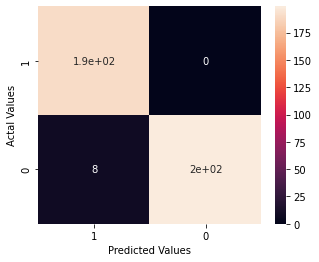

In [93]:
X = newdata.drop(['binary_price_range'], axis=1)
y = newdata['binary_price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
SVMClassifier(X_train, X_test, y_train, y_test)

In [95]:
data['sc_area'] = data["sc_w"] * data["sc_h"]
data['m_volume'] = data['sc_area'] * data['m_dep']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy: 0.97


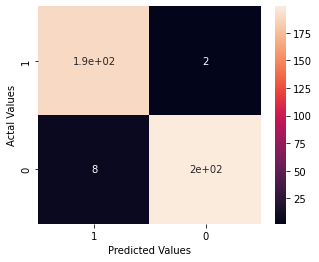

In [96]:
X = newdata.drop(['binary_price_range'], axis=1)
y = newdata['binary_price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
SVMClassifier(X_train, X_test, y_train, y_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facc0c75bd0>,
      dtype=object)

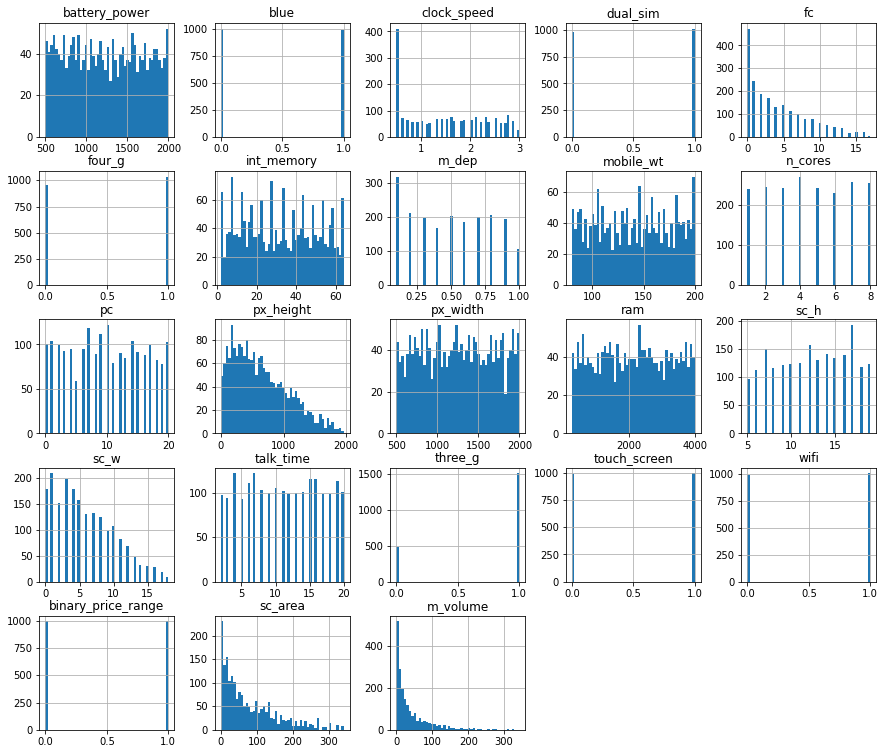

In [97]:
data.hist(bins=50, figsize=(15,13))

In [98]:
newdata = data
newdata['px_height'] = np.log(data['px_height']+1)
newdata['sc_w'] = np.log(data['sc_w']+1)
newdata['fc'] = np.log(data['fc']+1)
newdata['sc_area'] = np.log(data['sc_area']+1)
newdata['m_volume'] = np.log(data['m_volume']+1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facc62ade50>,
      dtype=object)

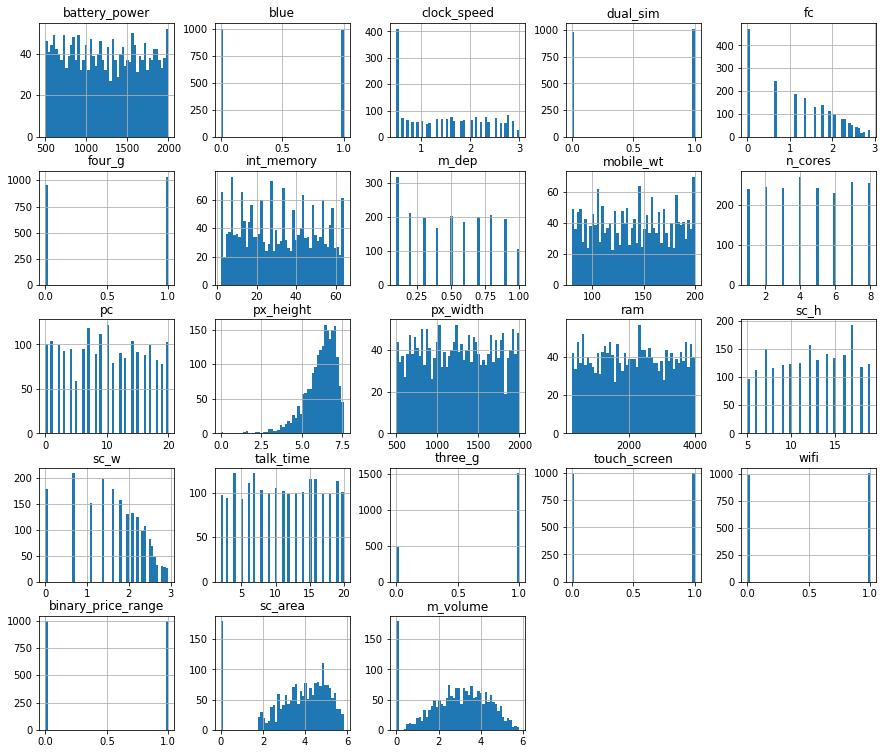

In [99]:
data.hist(bins=50, figsize=(15,13))

Accuracy: 0.97


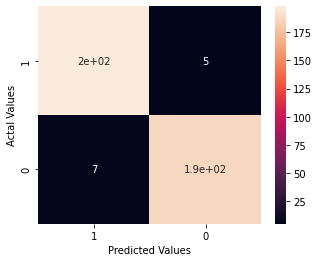

In [100]:
X = newdata.drop(['binary_price_range'], axis=1)
y = newdata['binary_price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
SVMClassifier(X_train, X_test, y_train, y_test)